# Exercício 2

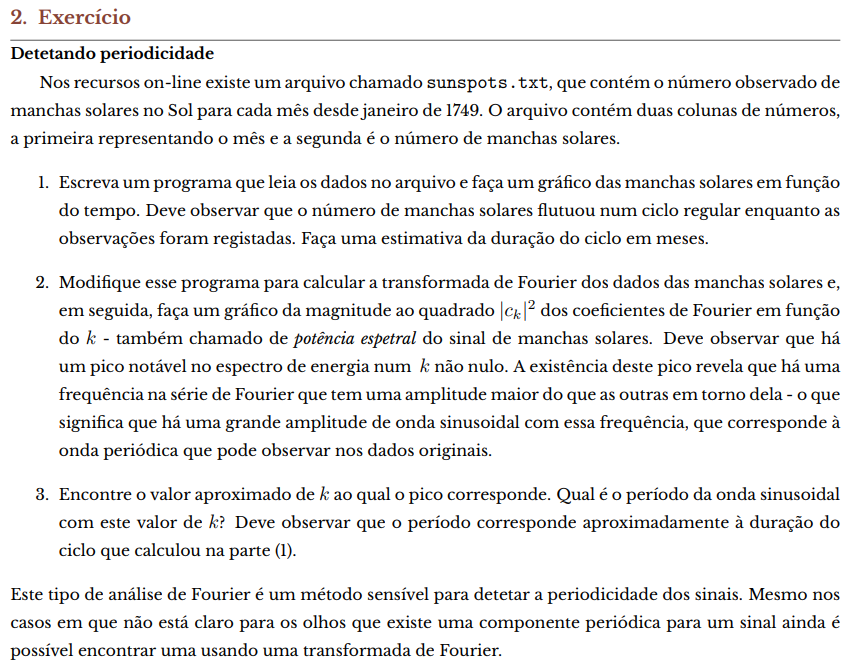

In [21]:
from typing import Callable
import numpy as np
import matplotlib.pyplot as plt

## Alínea 1

Contamos 24 vales que aparecem numa duração de 3142 meses, pelo que o ciclo deve ter uma duração média de:

$$
\frac{3142}{24} = 131 \text{ meses}
$$

O último mês é 3142


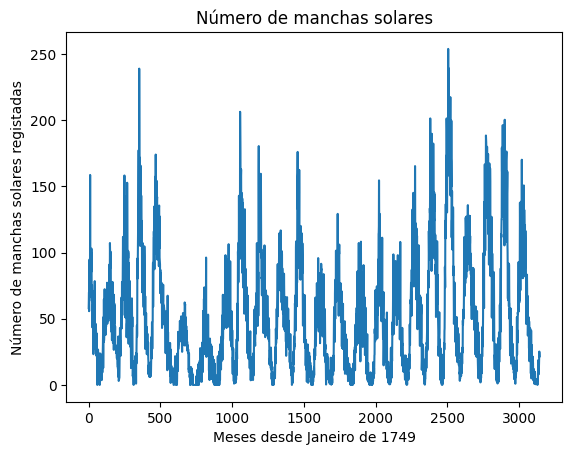

In [29]:
# Obter os dados
dados = np.loadtxt("02-sunspots.txt", float)

# Organizar os dados
tt, mm = np.array([i[0] for i in dados]), np.array([i[1] for i in dados])

# Representar graficamente
plt.plot(tt, mm)
plt.title("Número de manchas solares")
plt.xlabel("Meses desde Janeiro de 1749")
plt.ylabel("Número de manchas solares registadas")

print(f"O último mês é {int(tt[-1])}.")

## Alínea 2

In [23]:
def dft(yn: np.ndarray, real: bool=True) -> np.ndarray:
    """
        Devolve os `N = len(yn)` primeiros coeficientes da Transformada de Fourier Discreta da sequência de números `yn`. Se `real == True` então assume que os números são reais e usa isso para calcular apenas metade dos coeficientes.
    """

    # Determinar N
    N = len(yn)

    # Determinar os coeficientes
    if real:

        # Guardar os coeficientes
        nn = np.arange(N)
        kk = np.arange(N//2 + 1)
        
        # Calcular os coeficientes por definição
        ck = np.zeros(N, dtype=np.complex128)
        ck[:(N//2) + 1] = np.exp(-2j * np.pi * np.outer(kk, nn) / N) @ yn

        # Usar o facto de termos números reais para obter logo a outra metade dos coeficientes
        for k in range(1, N//2 + 1):
            ck[N - k] = np.conjugate(ck[k])

        return ck
    
    else:

        # Guardar os coeficientes
        nn = np.arange(N)
        kk = np.arange(N)
        
        # Calcular os coeficientes por definição
        return np.exp(-2j * np.pi * np.outer(kk, nn) / N) @ yn

O valor máximo de k é 24.


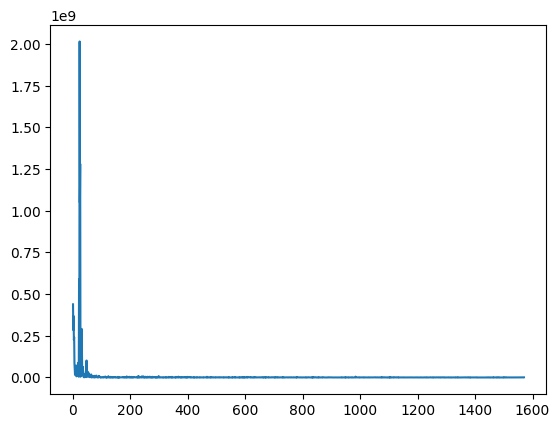

In [26]:
# Coeficientes da DFT (apenas nos interessa a primeira metade)
N = len(mm)
cc = dft(mm, real=True)[:int(N/2)]

# Potência espetral
kk = np.arange(0, int(N/2))
ee = abs(cc)**2

# Encontrar o máximo
kmax = np.argmax(ee[1:])
print(f"O valor máximo de k é {kmax+1}.")

# Representação gráfica
plt.plot(kk[1:], ee[1:])

## Alínea 3

O valor de $k$ encontrado corresponde ao calculado na alínea 1.